In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

In [2]:
# Read in the data
#Data = pd.read_csv('Full_Data.csv', encoding = "ISO-8859-1")
#Data.head(1)
data = pd.read_csv('Full_Data.csv', encoding = "ISO-8859-1")
data.head(1)
type(data)

pandas.core.frame.DataFrame

In [3]:
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']
train.head(1)
#test.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


In [4]:
# Removing punctuations
slicedData= train.iloc[:,2:27]
slicedData.head(1)
print(type(slicedData))
slicedData.replace(to_replace="[^a-zA-Z]", value=" ", regex=True, inplace=True)
#slicedData.head(1)
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
slicedData.columns= new_Index
#slicedData.head(5)

# Convertng headlines to lower case
for index in new_Index:
    slicedData[index]=slicedData[index].str.lower()
slicedData.head(1)

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [5]:
headlines = []
for row in range(0,len(slicedData.index)):
    headlines.append(' '.join(str(x) for x in slicedData.iloc[row,0:25]))

In [6]:
headlines[0]
type(headlines)
print(headlines[1])

scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite


In [7]:
#use in stemming
#tokenzing headlines
headlines1 = pd.DataFrame(headlines)
type(headlines1)
#print(headlines1.head())
tokenized_tweet = headlines1[0].apply(lambda x: x.split())
print(type(tokenized_tweet[0]))



<class 'list'>


Word2Vec(vocab=46028, size=100, alpha=0.025)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[ 3.59395051 -0.46180904  3.84088302 ..., -0.44355237 -0.42957851
 -0.41899514]


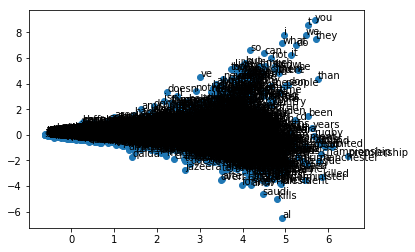

In [8]:
#word2Vec gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
#print(tokenized_tweet[0])
# train model
model = Word2Vec(tokenized_tweet, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
#print(words)
# access vector for one word
#print(model['hindrance'])
type(words)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(result[:,0])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
#print(words)

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [9]:
#summary
from gensim.summarization import keywords

print ('Keywords:')

print (keywords(headlines[0]))


Keywords:
party
langer
spoils
hit
cold alex
target derby
hunters threaten
depleted leicester
hammers hand
testy
double
stump
leeds


In [10]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
#tokenized_tweet[1]


0    [a, hindranc, to, oper, extract, from, the, le...
1    [scorecard, the, best, lake, scene, leader, ge...
2    [coventri, caught, on, counter, by, flo, unit,...
3    [pilgrim, know, how, to, progress, thatcher, f...
4    [hitch, and, horlock, beckham, off, but, unit,...
Name: 0, dtype: object

In [11]:
#use in stemming
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
print(type(tokenized_tweet))
headlines1[0] = tokenized_tweet
headlines1.head(1)

<class 'pandas.core.series.Series'>


,0
0,a hindranc to oper extract from the leak repor...


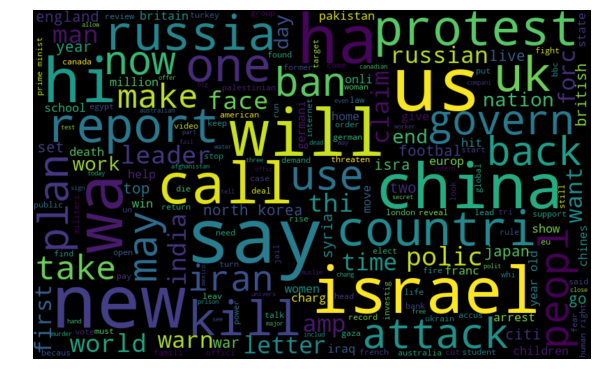

In [12]:
#use in stemming
#Create word cloud to visualize word frequency
all_words = ' '.join([text for text in headlines1[0]])
all_words[0:2]
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
#use in stemming
#headlines=list(headlines)
print(type(headlines1))
#headlines.shape()
basicvectorizer = CountVectorizer(ngram_range=(1,1))
basictrain = basicvectorizer.fit_transform(headlines1[0])
#basictrain = basicvectorizer.fit_transform(headlines)
print(basictrain.shape)
basictrain.toarray()

<class 'pandas.core.frame.DataFrame'>
(3975, 31911)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
#use in stemmming
basicmodel1 = LogisticRegression()
basicmodel1 = basicmodel1.fit(basictrain, train["Label"])

In [15]:
#use in stemming
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest1 = basicvectorizer.transform(testheadlines)
predictions1 = basicmodel1.predict(basictest1)

In [16]:
#use in stemming
predictions1

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1,

In [17]:
#use in stemming
print ("Confusion Matrix")
pd.crosstab(test["Label"], predictions1, rownames=["Actual"], colnames=["Predicted"])

Confusion Matrix


Predicted,0,1
Actual,,
0,75,111
1,15,177


In [18]:
#use in stemming
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

print (classification_report(test["Label"], predictions1))
print (accuracy_score(test["Label"], predictions1))

             precision    recall  f1-score   support

          0       0.83      0.40      0.54       186
          1       0.61      0.92      0.74       192

avg / total       0.72      0.67      0.64       378

0.666666666667


In [19]:
#use in stemming
basicvectorizer2 = CountVectorizer(ngram_range=(1,2))
basictrain2 = basicvectorizer2.fit_transform(headlines)
print(basictrain2.shape)

basicmodel2 = LogisticRegression()
basicmodel2 = basicmodel2.fit(basictrain2, train["Label"])

basictest2 = basicvectorizer2.transform(testheadlines)
predictions2 = basicmodel2.predict(basictest2)

pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

print (classification_report(test["Label"], predictions2))
print (accuracy_score(test["Label"], predictions2))


(3975, 630291)
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       186
          1       0.83      0.89      0.86       192

avg / total       0.86      0.85      0.85       378

0.854497354497
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       186
          1       0.83      0.89      0.86       192

avg / total       0.86      0.85      0.85       378

0.854497354497


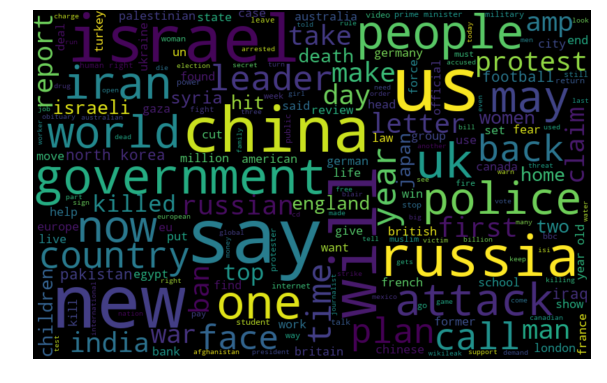

In [20]:
#Create word cloud to visualize word frequency
all_words = ' '.join([text for text in headlines])
all_words[0:2]
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
#headlines=list(headlines)
print(type(headlines))
#headlines.shape()
basicvectorizer = CountVectorizer(ngram_range=(1,1))
#basictrain = basicvectorizer.fit_transform(headlines[0])
basictrain = basicvectorizer.fit_transform(headlines)
print(basictrain.shape)
basictrain.toarray()

<class 'list'>
(3975, 46002)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [15]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [19]:
for i in range(len(predictions)):
    print(predictions[i])

1
0
0
1
1
0
0
0
0
0
1
1
1
1
0
1
0
0
1
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
1
1
0
0
1
1
0
0
0
1
1
1
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
1
0
1
1
0
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
1
0
0
1
0
0
1
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
1
1
0
0
1
0
0
1
0
1
1
1
1
1
0
1
0
0
1
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
0
0
1
0
1
0
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
1
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1


In [17]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,149,37
1,30,162


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

print (classification_report(test["Label"], predictions))
print (accuracy_score(test["Label"], predictions))

             precision    recall  f1-score   support

          0       0.83      0.80      0.82       186
          1       0.81      0.84      0.83       192

avg / total       0.82      0.82      0.82       378

0.822751322751


In [15]:
basicvectorizer2 = CountVectorizer(ngram_range=(1,2))
basictrain2 = basicvectorizer2.fit_transform(headlines)
print(basictrain2.shape)

basicmodel2 = LogisticRegression()
basicmodel2 = basicmodel2.fit(basictrain2, train["Label"])

basictest2 = basicvectorizer2.transform(testheadlines)
predictions2 = basicmodel2.predict(basictest2)

pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

print (classification_report(test["Label"], predictions2))
print (accuracy_score(test["Label"], predictions2))


(3975, 630291)
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       186
          1       0.83      0.89      0.86       192

avg / total       0.86      0.85      0.85       378

0.854497354497
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       186
          1       0.83      0.89      0.86       192

avg / total       0.86      0.85      0.85       378

0.854497354497


In [14]:
basicvectorizer3 = CountVectorizer(ngram_range=(2,3))
basictrain3 = basicvectorizer3.fit_transform(headlines)
print(basictrain3.shape)

basicmodel3 = LogisticRegression()
basicmodel3 = basicmodel3.fit(basictrain3, train["Label"])

basictest3 = basicvectorizer3.transform(testheadlines)
predictions3 = basicmodel3.predict(basictest3)

pd.crosstab(test["Label"], predictions3, rownames=["Actual"], colnames=["Predicted"])

print (classification_report(test["Label"], predictions3))
print (accuracy_score(test["Label"], predictions3))

(3975, 1553543)
             precision    recall  f1-score   support

          0       0.89      0.83      0.86       186
          1       0.85      0.90      0.87       192

avg / total       0.87      0.87      0.86       378

0.865079365079


In [1]:
#below this there is my self practice
cv = CountVectorizer()
xtraincv = cv.fit_transform(["Hi How are you, how are you doing ?","Hey ! whatapps?", " Wow cool tutorial"])
print(xtraincv.toarray())
print(cv.get_feature_names())

NameError: name 'CountVectorizer' is not defined

In [16]:
cv1 = CountVectorizer(ngram_range=(1,2))
xtraincv = cv1.fit_transform(["Hi How are you, how are you doing ?","Hey ! whatapps?", " Wow cool tutorial"])
xtraincv.toarray()


array([[2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]], dtype=int64)

In [17]:
cv1.get_feature_names()

['are',
 'are you',
 'cool',
 'cool tutorial',
 'doing',
 'hey',
 'hey whatapps',
 'hi',
 'hi how',
 'how',
 'how are',
 'tutorial',
 'whatapps',
 'wow',
 'wow cool',
 'you',
 'you doing',
 'you how']

In [18]:
cv.get_feature_names()

['are',
 'cool',
 'doing',
 'hey',
 'hi',
 'how',
 'tutorial',
 'whatapps',
 'wow',
 'you']

In [19]:
#tokenzing headlines
headlines = pd.DataFrame(headlines)
type(headlines)
headlines.head()
tokenized_tweet = headlines[0].apply(lambda x: x.split())
tokenized_tweet.head(1)

0    [a, hindrance, to, operations, extracts, from,...
Name: 0, dtype: object

In [20]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
#tokenized_tweet[1]

0    [a, hindranc, to, oper, extract, from, the, le...
1    [scorecard, the, best, lake, scene, leader, ge...
2    [coventri, caught, on, counter, by, flo, unit,...
3    [pilgrim, know, how, to, progress, thatcher, f...
4    [hitch, and, horlock, beckham, off, but, unit,...
Name: 0, dtype: object

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

headlines[0] = tokenized_tweet
headlines.head(1)

,0
0,a hindranc to oper extract from the leak repor...


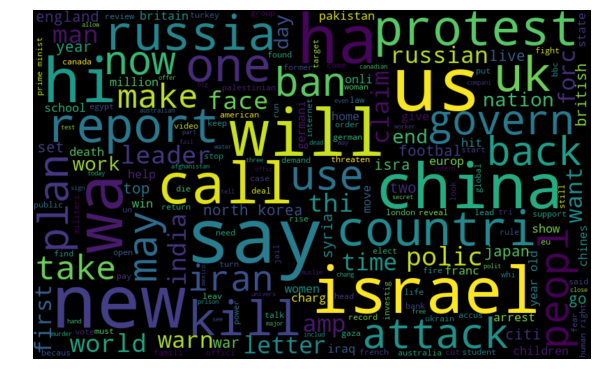

In [22]:
all_words = ' '.join([text for text in headlines[0]])
all_words[0:2]
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]


In [8]:
# !pip install package name
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [85]:
#SentiWordNet is a lexical resource for opinion mining that assigns to each synset of WordNet three sentiment 
#scores: positivity, negativity, and objectivity
#WordNet is a lexical database for the English language
from nltk.corpus import wordnet
sysn = wordnet.synsets("program")
print(sysn)
#sysnset
print(sysn[0].name())
print(sysn[0].definition())
print(sysn[0].examples())
#print(sysn[0].lemmas()[0].antonyms()[0].name())

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]
plan.n.01
a series of steps to be carried out or goals to be accomplished
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


IndexError: list index out of range

In [3]:
#gensim
#A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning.
from gensim.models import Word2Vec

In [2]:
!pip install gensim

  Using cached https://files.pythonhosted.org/packages/54/ee/c1f685caa83ee9b8f54573b51648af61b01377bcc5981a18704f5247cce7/gensim-3.7.1-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c3/ef/f81d8c35c7254fe2af9a1a8e034f07b88a824a441f37955d0a07a90b8ec7/boto3-1.9.130-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/21/80/6683916e9e1eaf867e09b81a6df6d7a2ba181e3095d2367c7a0f635ed1ed/botocore-1.12.130-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/de/5737f602e22073ecbded7a0c590707085e154e32b68d86545dcc31004c02/s3transfer-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/83/94/7179c3832a6d45b266ddb2aac329e101367fbdb11f425f13771d27f225bb/jmespath-0.9.4-py2.py3-none-any.whl


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<class 'list'>
[[ 0.00769368  0.00557084]
 [ 0.00647706  0.00470142]
 [-0.0066936  -0.00106621]
 [ 0.01089367 -0.00930197]
 [-0.01279753 -0.00578268]
 [ 0.00682029 -0.01120276]
 [ 0.01516629  0.00064832]
 [ 0.0104816  -0.00603344]
 [-0.00821103 -0.0097941 ]
 [-0.01340996 -0.01571147]
 [ 0.00908763  0.01020555]
 [-0.00357364  0.0125494 ]
 [-0.00986644  0.01908025]
 [-0.01206801  0.00613683]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


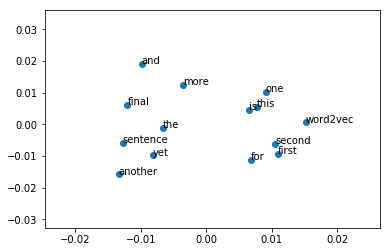

In [50]:

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
print(type(sentences))
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(result)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [10]:
!pip install gensim


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
